In [323]:
import pickle

# Load the model using pickle
with open('models/LogisticRegression_pipeline.pkl', 'rb') as f:
    model = pickle.load(f)

# Check the model
model

Pipeline(steps=[('vect', CountVectorizer(stop_words='english')),
                ('clf', LogisticRegression())])

In [324]:
# Need to prepare the news headlines in the same way as the training data
# Load the news headlines
import pandas as pd
import re
from nltk.stem import WordNetLemmatizer
import nltk

# # Preprocessing function
# def preprocess(textdata):
#     processedText = []
    
#     # Create Lemmatizer
#     wordLemm = WordNetLemmatizer()
    
#     # Defining regex patterns
#     urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
#     userPattern = '@[^\s]+'
#     alphaPattern = "[^a-zA-Z0-9]"
#     sequencePattern = r"(.)\1\1+"
#     seqReplacePattern = r"\1\1"
    
#     for tweet in textdata:
#         tweet = tweet.lower()
#         tweet = re.sub(urlPattern, 'URL', tweet)
#         tweet = re.sub(userPattern, 'USER', tweet)        
#         tweet = re.sub(alphaPattern, " ", tweet)
#         tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

#         tweetwords = ''
#         for word in tweet.split():
#             if len(word) > 1:
#                 word = wordLemm.lemmatize(word)
#                 tweetwords += (word + ' ')
            
#         processedText.append(tweetwords)
        
#     return processedText
def preprocess(input_series):
    result_series = input_series.copy()
    
    # Apply preprocessing steps to the series
    result_series = result_series.str.lower()  # Convert to lowercase
    result_series = result_series.str.replace("[^\w\s]", "", regex=True)  # Remove punctuation marks
    result_series = result_series.str.replace("\d+", "", regex=True)  # Remove numbers
    result_series = result_series.str.replace("\s+", " ", regex=True)  # Replace newlines and multiple spaces with a single space

    return result_series



In [325]:
# load the data which is in this format ,title,date,stock

data = pd.read_csv('raw_analyst_ratings.csv')

data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [326]:

# Get just the news headlines for Apple stock
aapl_data = data[data['stock'] == 'AAPL']

aapl_data.head()

,Unnamed: 0,headline,url,publisher,date,stock
6680,7120,Tech Stocks And FAANGS Strong Again To Start D...,https://www.benzinga.com/government/20/06/1622...,JJ Kinahan,2020-06-10 11:33:26-04:00,AAPL
6681,7121,10 Biggest Price Target Changes For Wednesday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-06-10 08:14:08-04:00,AAPL
6682,7122,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",https://www.benzinga.com/short-sellers/20/06/1...,Benzinga Newsdesk,2020-06-10 07:53:47-04:00,AAPL
6683,7123,"Deutsche Bank Maintains Buy on Apple, Raises P...",https://www.benzinga.com/news/20/06/16219873/d...,Benzinga Newsdesk,2020-06-10 07:19:25-04:00,AAPL
6684,7124,Apple To Let Users Trade In Their Mac Computer...,https://www.benzinga.com/news/20/06/16218697/a...,Neer Varshney,2020-06-10 06:27:11-04:00,AAPL


In [327]:
# Get the number of rows and columns
aapl_data.shape

(441, 6)

In [328]:
# Get the date range
print(aapl_data['date'].min())
print(aapl_data['date'].max())

2020-03-09 00:00:00
2020-06-10 11:33:26-04:00


In [329]:
# Get the stock with the most amount of dates
data['stock'].value_counts()

stock
MRK     3333
MS      3238
NVDA    3146
MU      3142
QQQ     3106
        ... 
PLW        1
RFT        1
WIP        1
ONEQ       1
BHL        1
Name: count, Length: 6204, dtype: int64

In [330]:
# Im going to use the MS stock as it has a lot of dates
stock = "QQQ"
news_data = data[data['stock'] == stock]

news_data.head()

,Unnamed: 0,headline,url,publisher,date,stock
1049426,1054626,Afternoon Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1622357...,Benzinga Insights,2020-06-10 12:12:25-04:00,QQQ
1049427,1054627,Morning Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1622174...,Benzinga Insights,2020-06-10 10:22:11-04:00,QQQ
1049428,1054628,Afternoon Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1621366...,Benzinga Insights,2020-06-09 12:14:26-04:00,QQQ
1049429,1054629,Cramer: NASDAQ Rebound Makes Sense As It Bette...,https://www.benzinga.com/markets/20/06/1621185...,Jayson Derrick,2020-06-09 10:31:06-04:00,QQQ
1049430,1054630,Morning Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1621207...,Benzinga Insights,2020-06-09 10:08:00-04:00,QQQ


In [331]:
news_data.shape

(3106, 6)

In [332]:
# Get the date range
print(news_data['date'].min())
print(news_data['date'].max())

2011-03-16 00:00:00
2020-06-10 12:12:25-04:00


In [333]:
news_data

,Unnamed: 0,headline,url,publisher,date,stock
1049426,1054626,Afternoon Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1622357...,Benzinga Insights,2020-06-10 12:12:25-04:00,QQQ
1049427,1054627,Morning Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1622174...,Benzinga Insights,2020-06-10 10:22:11-04:00,QQQ
1049428,1054628,Afternoon Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1621366...,Benzinga Insights,2020-06-09 12:14:26-04:00,QQQ
1049429,1054629,Cramer: NASDAQ Rebound Makes Sense As It Bette...,https://www.benzinga.com/markets/20/06/1621185...,Jayson Derrick,2020-06-09 10:31:06-04:00,QQQ
1049430,1054630,Morning Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1621207...,Benzinga Insights,2020-06-09 10:08:00-04:00,QQQ
...,...,...,...,...,...,...
1052527,1057738,"Stocks Grind Higher On Wednesday (SPY, QQQQ, G...",https://www.benzinga.com/etfs/bond-etfs/11/03/...,Scott Rubin,2011-03-23 00:00:00,QQQ
1052528,1057739,"Doug Kass Shorting Broader ETFs (IWM, SPY, QQQ)",https://www.benzinga.com/trading-ideas/short-i...,Roger Nachman,2011-03-23 00:00:00,QQQ
1052529,1057740,"Reminder: QQQQ Changes To QQQ Today (QQQQ, QQQ)",https://www.benzinga.com/etfs/new-etfs/11/03/9...,Benzinga Staff,2011-03-23 00:00:00,QQQ
1052530,1057741,PowerShares QQQ Ticker to Change from ‘QQQQ' t...,https://www.benzinga.com/etfs/sector-etfs/11/0...,Benzinga Staff,2011-03-23 00:00:00,QQQ


In [334]:
# Apply the preprocessing function to the news headlines
news_data['headline'] = preprocess(news_data['headline'])

/tmp/ipykernel_287564/1806826321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_data['headline'] = preprocess(news_data['headline'])


In [335]:
news_data

,Unnamed: 0,headline,url,publisher,date,stock
1049426,1054626,afternoon market stats in minutes,https://www.benzinga.com/markets/20/06/1622357...,Benzinga Insights,2020-06-10 12:12:25-04:00,QQQ
1049427,1054627,morning market stats in minutes,https://www.benzinga.com/markets/20/06/1622174...,Benzinga Insights,2020-06-10 10:22:11-04:00,QQQ
1049428,1054628,afternoon market stats in minutes,https://www.benzinga.com/markets/20/06/1621366...,Benzinga Insights,2020-06-09 12:14:26-04:00,QQQ
1049429,1054629,cramer nasdaq rebound makes sense as it better...,https://www.benzinga.com/markets/20/06/1621185...,Jayson Derrick,2020-06-09 10:31:06-04:00,QQQ
1049430,1054630,morning market stats in minutes,https://www.benzinga.com/markets/20/06/1621207...,Benzinga Insights,2020-06-09 10:08:00-04:00,QQQ
...,...,...,...,...,...,...
1052527,1057738,stocks grind higher on wednesday spy qqqq gld ...,https://www.benzinga.com/etfs/bond-etfs/11/03/...,Scott Rubin,2011-03-23 00:00:00,QQQ
1052528,1057739,doug kass shorting broader etfs iwm spy qqq,https://www.benzinga.com/trading-ideas/short-i...,Roger Nachman,2011-03-23 00:00:00,QQQ
1052529,1057740,reminder qqqq changes to qqq today qqqq qqq,https://www.benzinga.com/etfs/new-etfs/11/03/9...,Benzinga Staff,2011-03-23 00:00:00,QQQ
1052530,1057741,powershares qqq ticker to change from qqqq to qqq,https://www.benzinga.com/etfs/sector-etfs/11/0...,Benzinga Staff,2011-03-23 00:00:00,QQQ


In [336]:
# Load the historical financial data
stock_data = pd.read_csv(f'{stock}_historical_data.csv')

stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-03-16,55.029999,55.340000,53.770000,54.150002,48.142254,176507700
1,2011-03-17,55.009998,55.240002,54.130001,54.650002,48.586777,94434500
2,2011-03-18,55.220001,55.220001,54.410000,54.450001,48.477268,94887200
3,2011-03-21,55.279999,55.779999,54.500000,55.500000,49.412094,57423000
4,2011-03-22,55.580002,55.610001,55.279999,55.400002,49.323044,36162100


In [337]:
# Predict the sentiment for the news headlines using the model



import nltk

# Download the VADER lexicon
nltk.download('vader_lexicon')


# Predict the sentiment using VADER
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

use_vader = False

# Store the VADER scores in `compound`
if use_vader:
    news_data['Sentiment'] = [vader.polarity_scores(v)['compound'] for v in news_data['headline']]
else:
    
    news_data['Sentiment'] = model.predict(news_data['headline'])
# news_data['Sentiment'] = [vader.polarity_scores(v)['compound'] for v in news_data['headline']]

news_data.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/calnan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/tmp/ipykernel_287564/1656287872.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_data['Sentiment'] = model.predict(news_data['headline'])


,Unnamed: 0,headline,url,publisher,date,stock,Sentiment
1049426,1054626,afternoon market stats in minutes,https://www.benzinga.com/markets/20/06/1622357...,Benzinga Insights,2020-06-10 12:12:25-04:00,QQQ,1
1049427,1054627,morning market stats in minutes,https://www.benzinga.com/markets/20/06/1622174...,Benzinga Insights,2020-06-10 10:22:11-04:00,QQQ,1
1049428,1054628,afternoon market stats in minutes,https://www.benzinga.com/markets/20/06/1621366...,Benzinga Insights,2020-06-09 12:14:26-04:00,QQQ,1
1049429,1054629,cramer nasdaq rebound makes sense as it better...,https://www.benzinga.com/markets/20/06/1621185...,Jayson Derrick,2020-06-09 10:31:06-04:00,QQQ,1
1049430,1054630,morning market stats in minutes,https://www.benzinga.com/markets/20/06/1621207...,Benzinga Insights,2020-06-09 10:08:00-04:00,QQQ,1


In [338]:
news_data['Sentiment'].value_counts()

Sentiment
1    2858
0     248
Name: count, dtype: int64

In [339]:
news_data['date'] = news_data['date'].str.split(' ').str[0]

news_data.head()

/tmp/ipykernel_287564/3699471706.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_data['date'] = news_data['date'].str.split(' ').str[0]


,Unnamed: 0,headline,url,publisher,date,stock,Sentiment
1049426,1054626,afternoon market stats in minutes,https://www.benzinga.com/markets/20/06/1622357...,Benzinga Insights,2020-06-10,QQQ,1
1049427,1054627,morning market stats in minutes,https://www.benzinga.com/markets/20/06/1622174...,Benzinga Insights,2020-06-10,QQQ,1
1049428,1054628,afternoon market stats in minutes,https://www.benzinga.com/markets/20/06/1621366...,Benzinga Insights,2020-06-09,QQQ,1
1049429,1054629,cramer nasdaq rebound makes sense as it better...,https://www.benzinga.com/markets/20/06/1621185...,Jayson Derrick,2020-06-09,QQQ,1
1049430,1054630,morning market stats in minutes,https://www.benzinga.com/markets/20/06/1621207...,Benzinga Insights,2020-06-09,QQQ,1


In [340]:
# Map the sentiment to numerical values
# if not use_vader:
#     sentiment_mapping = {'negative': -1, 'neutral': 0, 'positive': 1}
#     news_data['Sentiment'] = news_data['Sentiment'].map(sentiment_mapping)

# Convert the 'date' column to datetime and extract the date part
news_data['date'] = pd.to_datetime(news_data['date']).dt.date

# Aggregate sentiment by date
# Here, you can calculate the average sentiment score for each day
average_daily_sentiment = news_data.groupby('date')['Sentiment'].min()

# Convert to DataFrame for merging
average_daily_sentiment = average_daily_sentiment.reset_index()

average_daily_sentiment.head()

/tmp/ipykernel_287564/1111547290.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_data['date'] = pd.to_datetime(news_data['date']).dt.date


,date,Sentiment
0,2011-03-16,0
1,2011-03-23,0
2,2011-03-25,1
3,2011-03-28,0
4,2011-03-29,0


In [341]:
# Merge with stock data

# Ensure the stock data's 'Date' column is in the correct format
# stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.date

# Remame the date column from average_daily_sentiment to 'Date'
average_daily_sentiment = average_daily_sentiment.rename(columns={'date': 'Date'})

average_daily_sentiment

,Date,Sentiment
0,2011-03-16,0
1,2011-03-23,0
2,2011-03-25,1
3,2011-03-28,0
4,2011-03-29,0
...,...,...
1099,2020-06-01,1
1100,2020-06-05,1
1101,2020-06-08,1
1102,2020-06-09,1


In [342]:
average_daily_sentiment

,Date,Sentiment
0,2011-03-16,0
1,2011-03-23,0
2,2011-03-25,1
3,2011-03-28,0
4,2011-03-29,0
...,...,...
1099,2020-06-01,1
1100,2020-06-05,1
1101,2020-06-08,1
1102,2020-06-09,1


In [343]:
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-03-16,55.029999,55.340000,53.770000,54.150002,48.142254,176507700
1,2011-03-17,55.009998,55.240002,54.130001,54.650002,48.586777,94434500
2,2011-03-18,55.220001,55.220001,54.410000,54.450001,48.477268,94887200
3,2011-03-21,55.279999,55.779999,54.500000,55.500000,49.412094,57423000
4,2011-03-22,55.580002,55.610001,55.279999,55.400002,49.323044,36162100
...,...,...,...,...,...,...,...
2319,2020-06-03,236.259995,237.470001,235.350006,236.690002,231.988998,37228700
2320,2020-06-04,236.330002,237.789993,233.679993,235.029999,230.361969,38716100
2321,2020-06-05,236.220001,240.300003,235.630005,239.690002,234.929443,47365600
2322,2020-06-08,239.539993,241.679993,237.910004,241.550003,236.752518,32937300


In [344]:
# Convert the 'Date' columns to datetime in both dataframes
average_daily_sentiment['Date'] = pd.to_datetime(average_daily_sentiment['Date'])
stock_data['Date'] = pd.to_datetime(stock_data['Date'])


# Merge the stock data with the sentiment data
merged_df = average_daily_sentiment.merge(stock_data, on='Date', how='right')



# Save the data
merged_df.to_csv(f'{stock}_data_with_sentiment.csv', index=False)

In [345]:
merged_df

,Date,Sentiment,Open,High,Low,Close,Adj Close,Volume
0,2011-03-16,0.0,55.029999,55.340000,53.770000,54.150002,48.142254,176507700
1,2011-03-17,NaN,55.009998,55.240002,54.130001,54.650002,48.586777,94434500
2,2011-03-18,NaN,55.220001,55.220001,54.410000,54.450001,48.477268,94887200
3,2011-03-21,NaN,55.279999,55.779999,54.500000,55.500000,49.412094,57423000
4,2011-03-22,NaN,55.580002,55.610001,55.279999,55.400002,49.323044,36162100
...,...,...,...,...,...,...,...,...
2319,2020-06-03,NaN,236.259995,237.470001,235.350006,236.690002,231.988998,37228700
2320,2020-06-04,NaN,236.330002,237.789993,233.679993,235.029999,230.361969,38716100
2321,2020-06-05,1.0,236.220001,240.300003,235.630005,239.690002,234.929443,47365600
2322,2020-06-08,1.0,239.539993,241.679993,237.910004,241.550003,236.752518,32937300


In [346]:
# Analyze the correlation
correlation = merged_df[['Close', 'Sentiment']].corr()
print(correlation)


              Close  Sentiment
Close      1.000000   0.244076
Sentiment  0.244076   1.000000


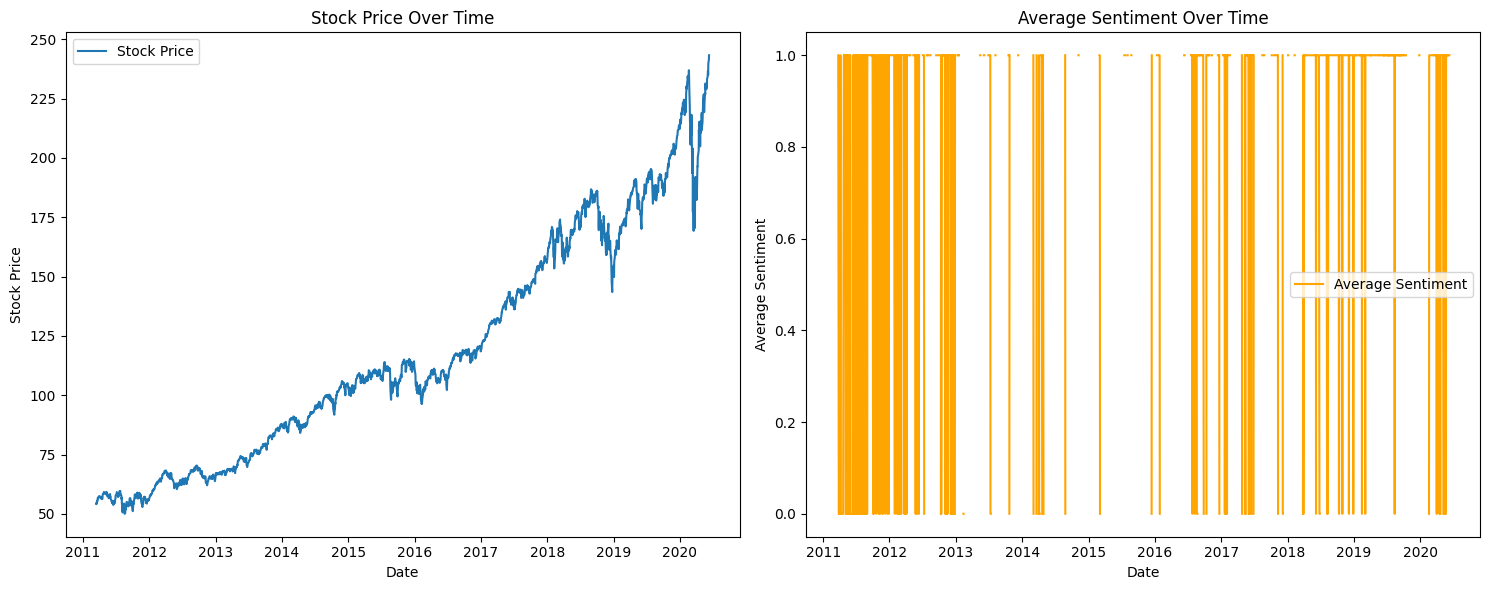

In [347]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(merged_df['Date'], merged_df['Close'], label='Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Over Time')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(merged_df['Date'], merged_df['Sentiment'], label='Average Sentiment', color='orange')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment Over Time')
plt.legend()

plt.tight_layout()
plt.show()


In [348]:
merged_df['Sentiment'].value_counts()

Sentiment
1.0    850
0.0    191
Name: count, dtype: int64

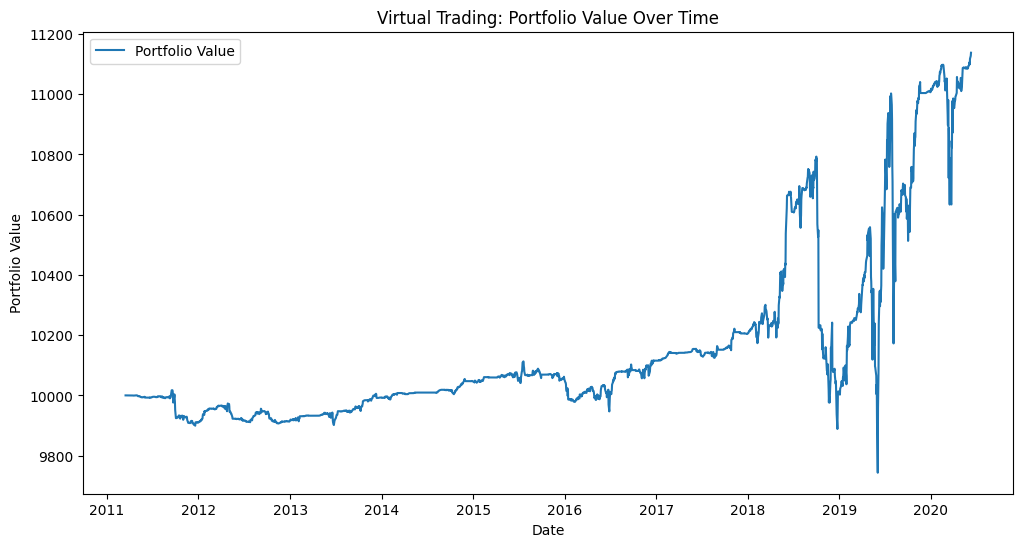

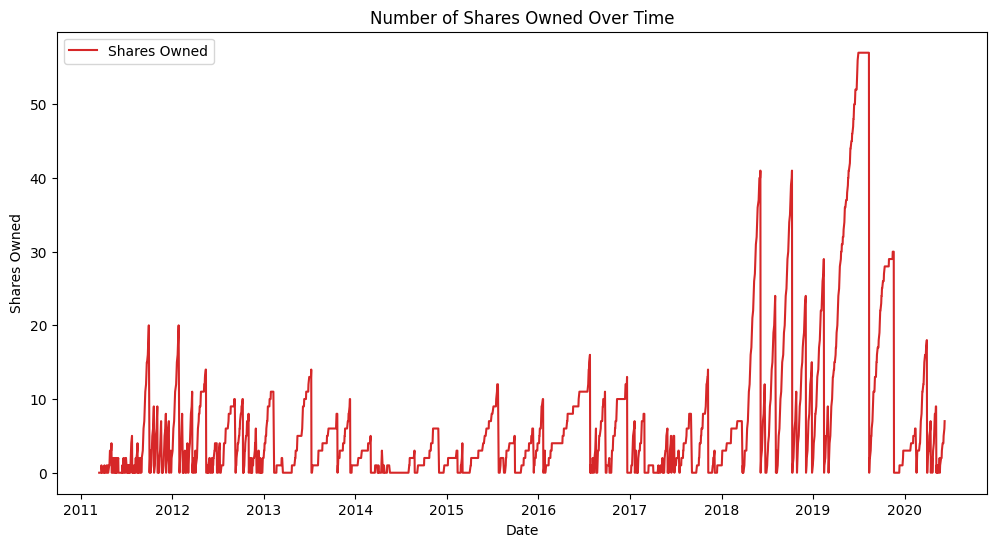

In [351]:
import matplotlib.pyplot as plt

# Initialize portfolio
cash = 10000
shares_owned = 0
portfolio_values = []
shares_history = []  # To track the number of shares owned over time

# Iterate over each day in the merged data
for index, row in merged_df.iterrows():
    stock_price = row['Close']
    sentiment = row['Sentiment']

    if sentiment > 0.05:  # Buy
        if cash > 0:
            # Buy as many shares as possible
            shares_bought = 1
            cash -= shares_bought * stock_price
            shares_owned += shares_bought

    elif sentiment == 0:  # Sell
        if shares_owned > 0:
            # Sell one shares
            
            cash += shares_owned * stock_price
            shares_owned = 0
    
    # Update portfolio value (cash + value of owned shares)
    portfolio_value = cash + (shares_owned * stock_price)
    portfolio_values.append(portfolio_value)
    shares_history.append(shares_owned)  # Record the number of shares owned

# Plot the portfolio value over time
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Date'], portfolio_values, label='Portfolio Value', color='tab:blue')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Virtual Trading: Portfolio Value Over Time')
plt.legend()
plt.show()

# Plot the number of shares owned over time
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Date'], shares_history, label='Shares Owned', color='tab:red')
plt.xlabel('Date')
plt.ylabel('Shares Owned')
plt.title('Number of Shares Owned Over Time')
plt.legend()
plt.show()


In [350]:
# Final portfolio value
print(f"Final Portfolio Value: {round(portfolio_value, 2)}")
increase = round(portfolio_value - 10000, 2)
print(f"Increase from Initial Investment: {increase}")
percentage_increase = round((increase / 10000) * 100, 2)
print(f"Percentage Increase: {percentage_increase}%")

Final Portfolio Value: 14510.4
Increase from Initial Investment: 4510.4
Percentage Increase: 45.1%
